In [ ]:
import numpy as np
from emdbc import Bias_Correction_EMD_disjoint

observed = np.load('./sample_data/observed.npy')
ycontrol = np.load('./sample_data/ycontrol.npy')
yproject = np.load('./sample_data/yproject.npy')

filter_configs = {
    'Biweekly': (1/30, 1/3),
    'Seasonal': (1/180, 1/30),
    'Annual': (1/(365*2.5), 1/180)
}

ycontrol_bc, yproject_bc = Bias_Correction_EMD_disjoint(observed, ycontrol, yproject, noise=0.00001, filter_configs=filter_configs)

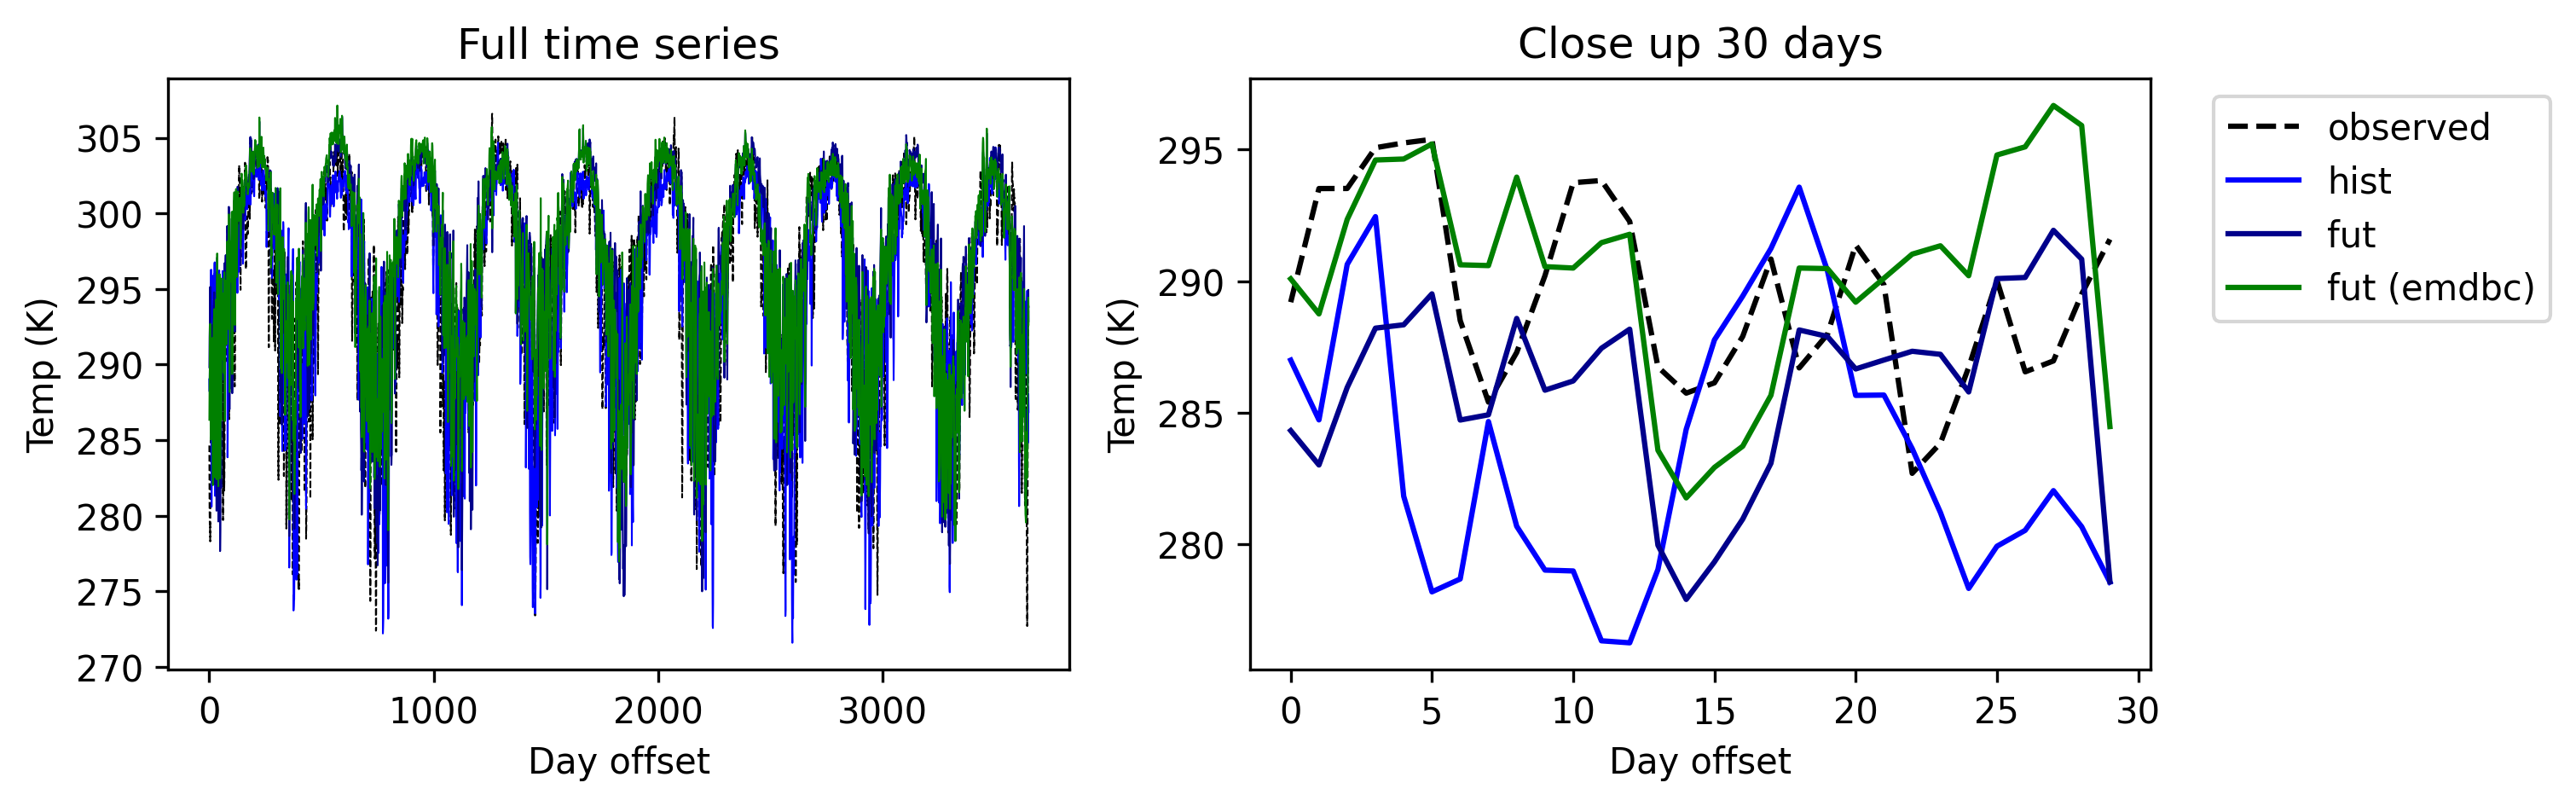

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3), dpi=300)
plt.subplot(1,2,1)
plt.title('Full time series')
plt.plot(observed, 'k--', label='observed', linewidth=0.5)
plt.plot(ycontrol, label='hist', color='blue', linewidth=0.5)
plt.plot(yproject, label='fut', color='darkblue', linewidth=0.5)
plt.plot(yproject_bc, label='fut (emdbc)', color='green', linewidth=0.5)
plt.ylabel('Temp (K)')
plt.xlabel('Day offset')

plt.subplot(1,2,2)
plt.title('Close up 30 days')
plt.plot(observed[365*3:(365*3)+30], 'k--', label='observed')
plt.plot(ycontrol[365*3:(365*3)+30], label='hist', color='blue')
plt.plot(yproject[365*3:(365*3)+30], label='fut', color='darkblue')
plt.plot(yproject_bc[365*3:(365*3)+30], label='fut (emdbc)', color='green')
plt.ylabel('Temp (K)')
plt.xlabel('Day offset')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()